In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("datasets/created/new_model.csv")


In [7]:
possible_features = ["rank_home", "rank_away"] + df.columns[8:25].tolist() + df.columns[37:-2].tolist()


In [8]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)


In [9]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)


In [10]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]


In [11]:
df_model[["home_team", "away_team", "home_score", "away_score", "home_goals_mean", "home_goals_mean_l5"]]


,home_team,away_team,home_score,away_score,home_goals_mean,home_goals_mean_l5
33,Colombia,Venezuela,0,0,1.714286,1.4
35,Chile,Bolivia,1,0,1.375000,1.2
37,Venezuela,Ecuador,2,2,0.375000,0.6
38,Colombia,Peru,1,2,1.500000,1.4
39,Uruguay,Chile,1,1,1.000000,0.6
...,...,...,...,...,...,...
214,Argentina,Ecuador,1,0,1.676471,1.4
215,Chile,Paraguay,3,0,0.969697,0.4
216,Ecuador,Bolivia,3,1,1.314286,0.6
217,Colombia,Bolivia,3,0,1.205882,1.6


# Home Team

In [12]:
target = 'home_score'
df_feats = df_model[[target] + possible_features]

In [13]:
possible_features[10:20]


['home_rank_mean_l5',
 'home_points_mean',
 'home_points_mean_l5',
 'away_goals_mean',
 'away_goals_mean_l5',
 'away_goals_suf_mean',
 'away_goals_suf_mean_l5',
 'away_rank_mean',
 'away_rank_mean_l5',
 'total_games_away']

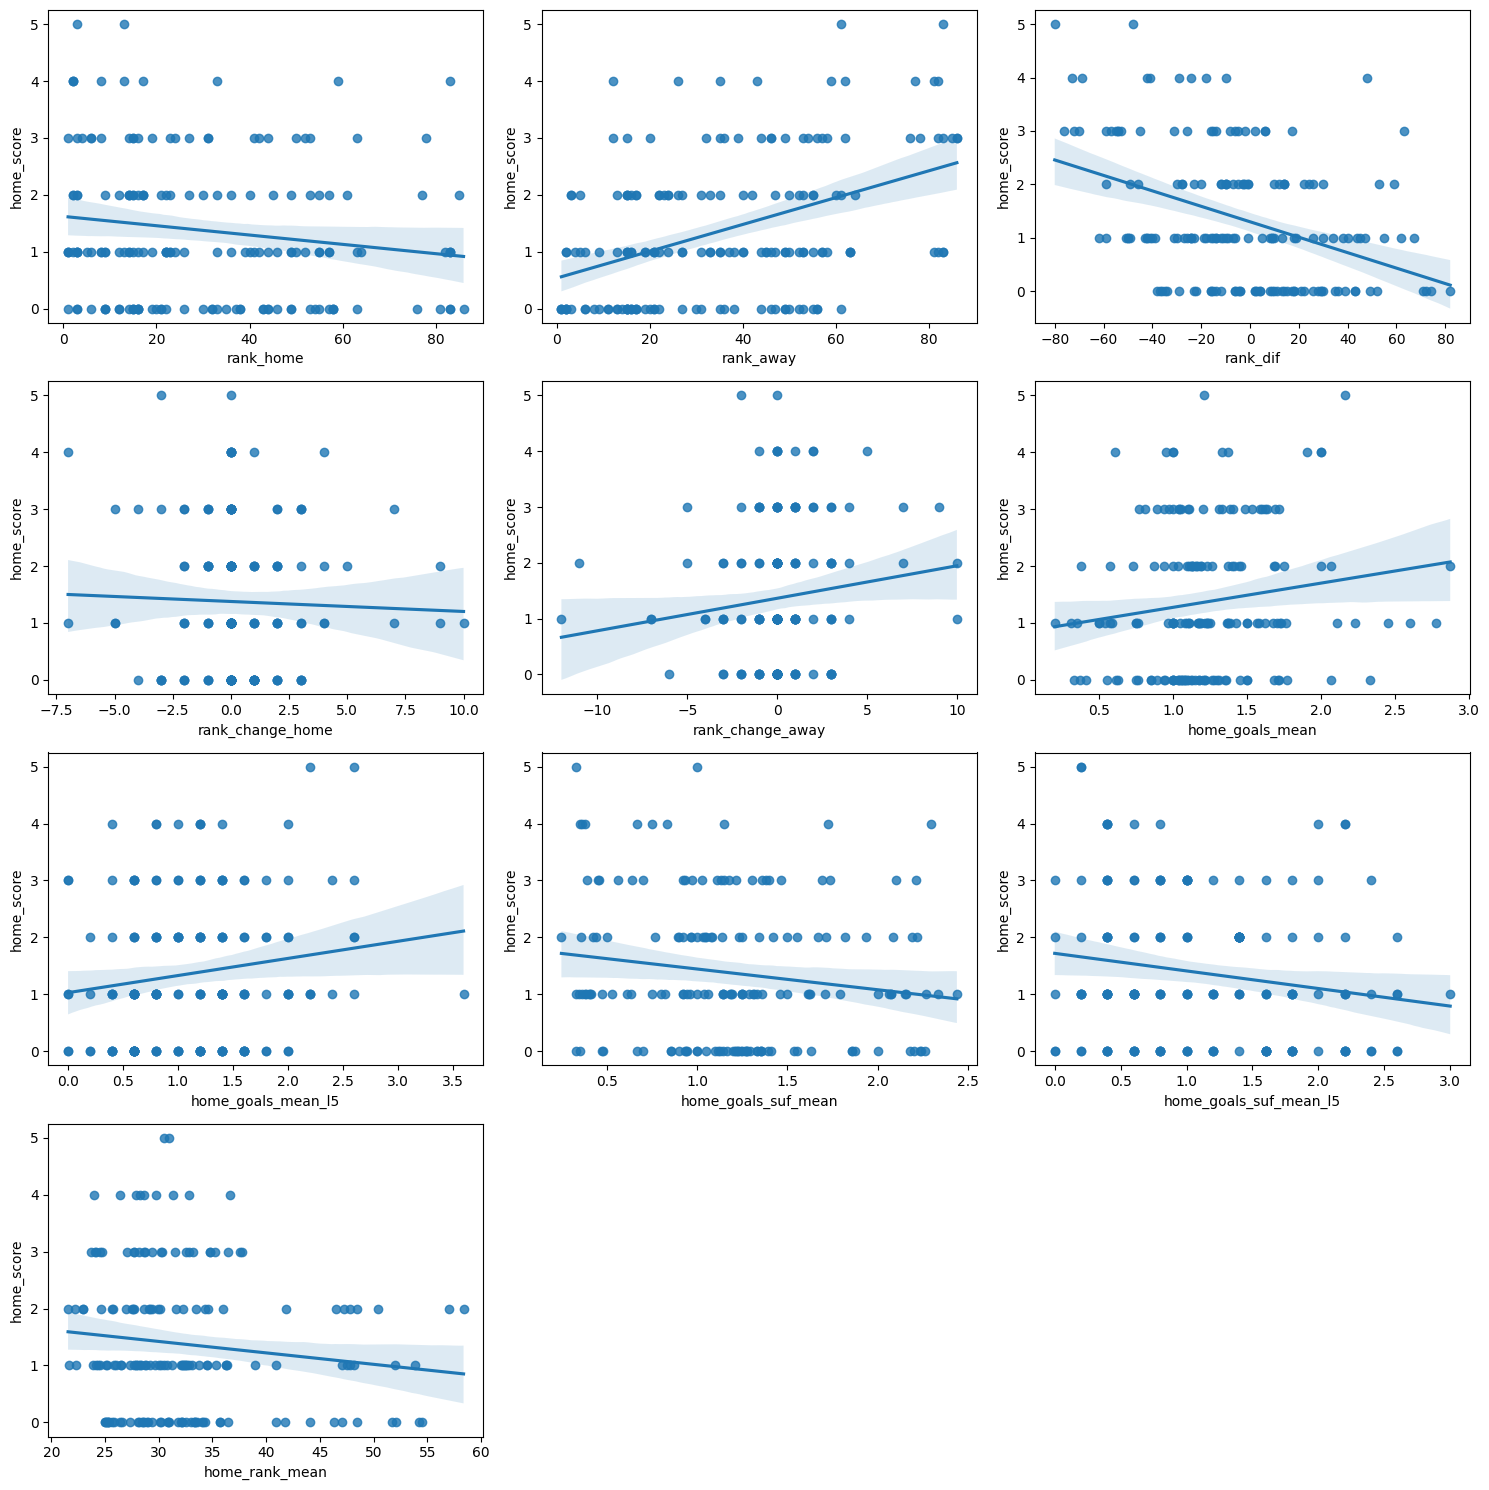

In [22]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[:10]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

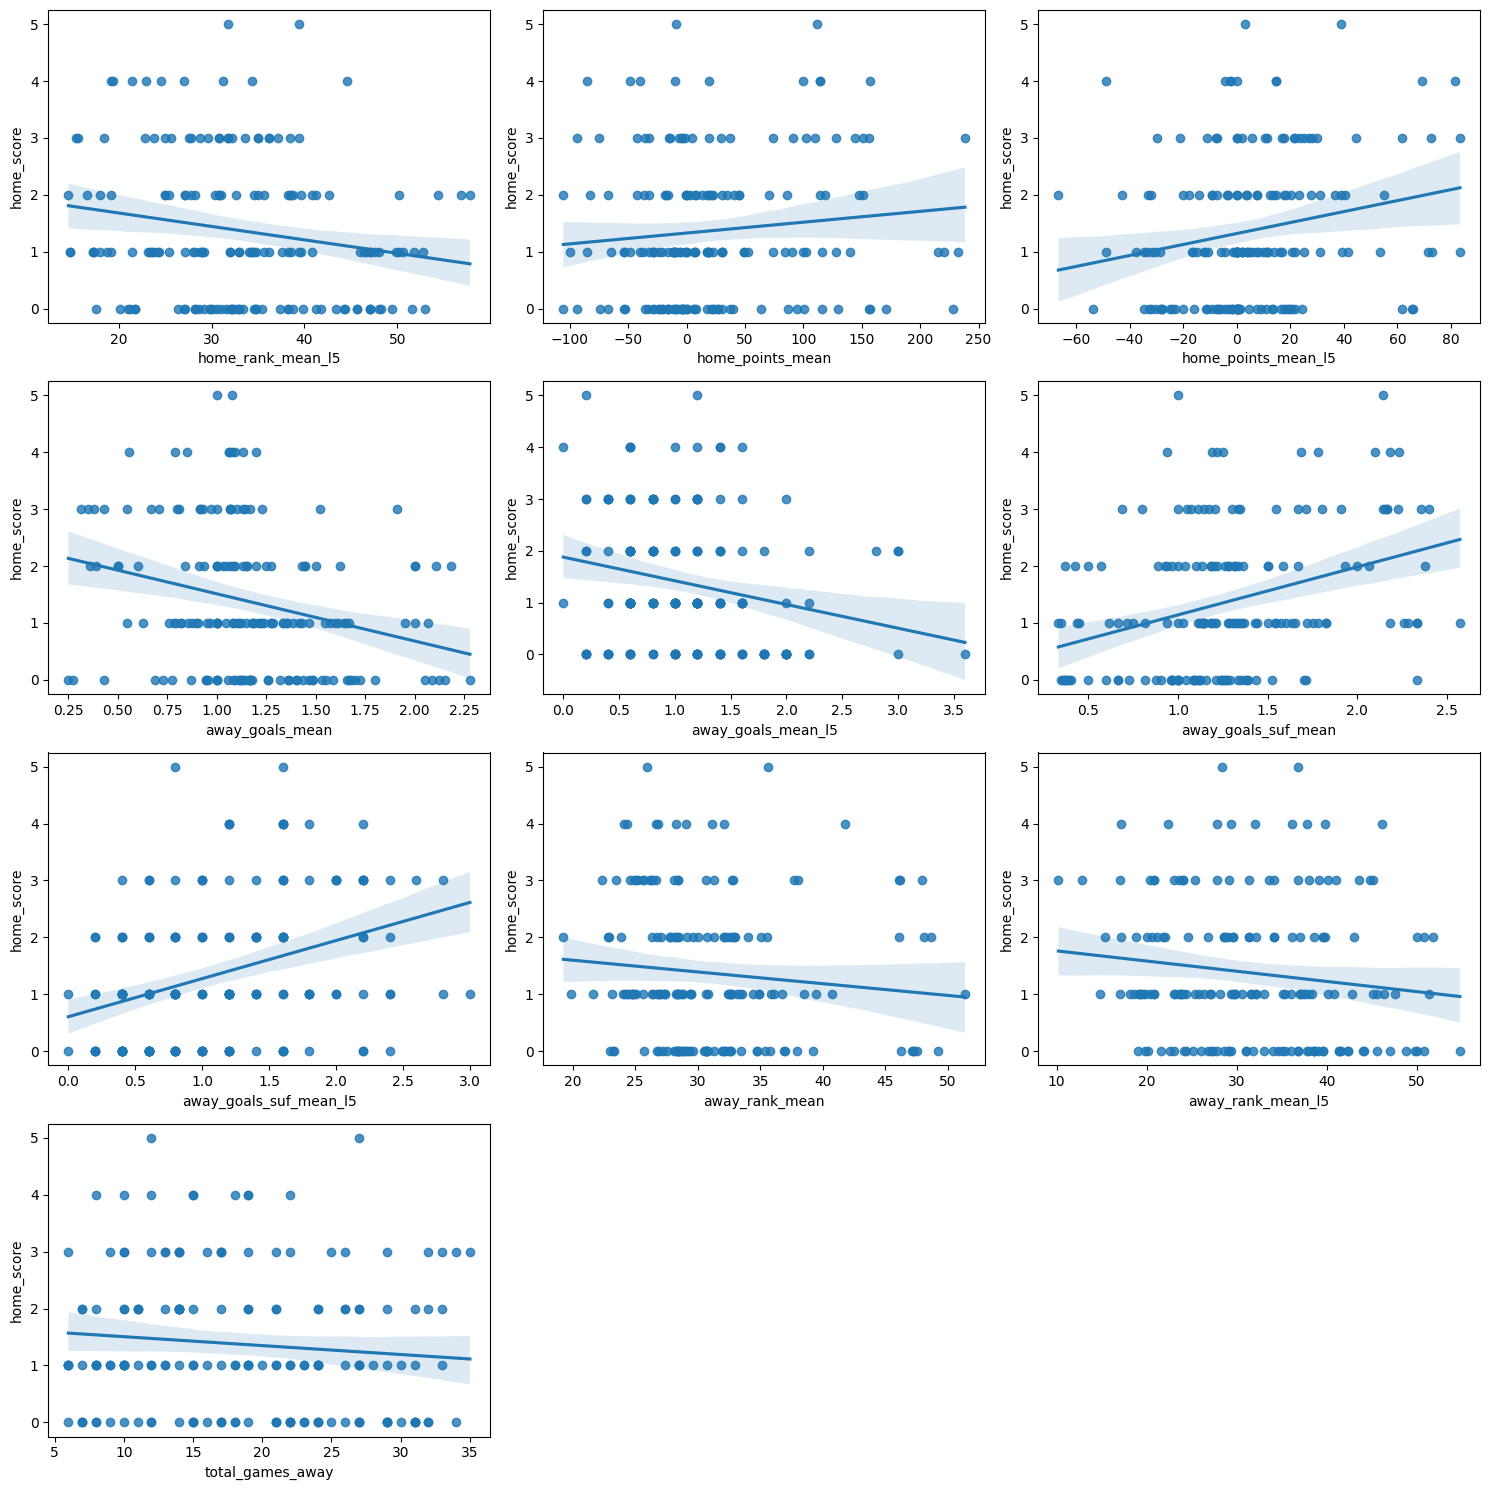

In [23]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[10:20])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[10:20]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

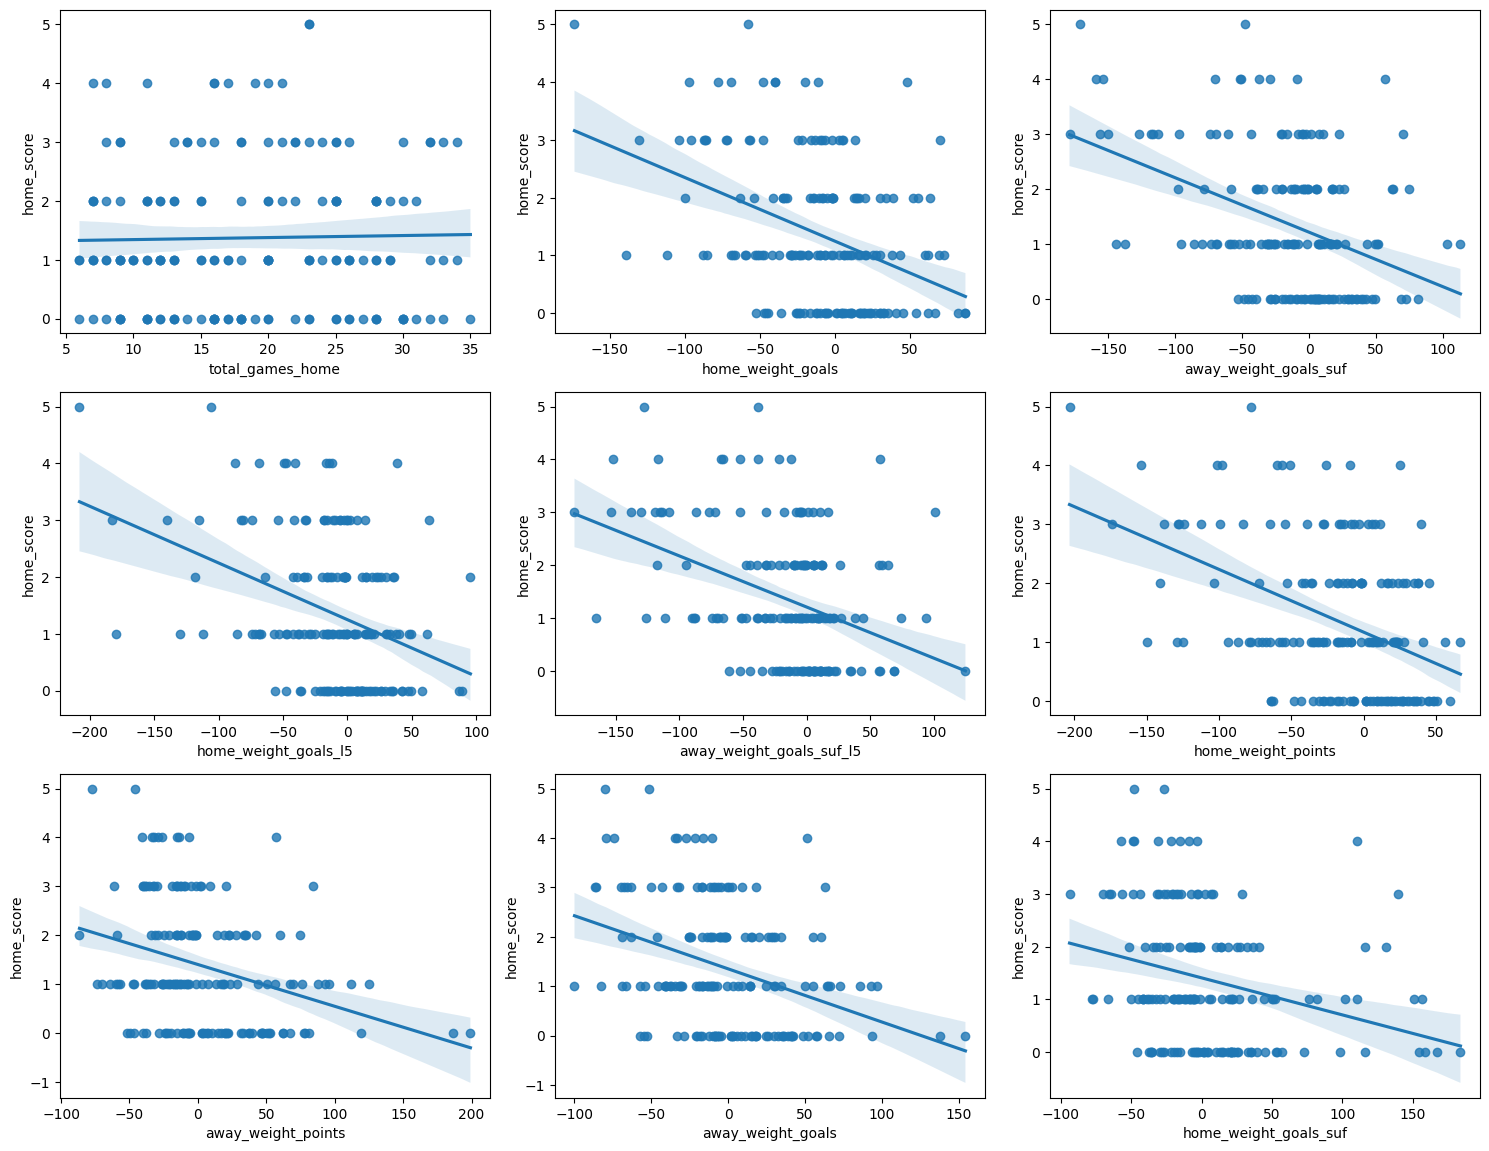

In [24]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[20:])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[20:]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

                     feature     slope  abs_slope
15       away_goals_suf_mean  0.844073   0.844073
13           away_goals_mean -0.830231   0.830231
16    away_goals_suf_mean_l5  0.669731   0.669731
14        away_goals_mean_l5 -0.457539   0.457539
5            home_goals_mean  0.425535   0.425535
7        home_goals_suf_mean -0.364917   0.364917
8     home_goals_suf_mean_l5 -0.309162   0.309162
6         home_goals_mean_l5  0.300818   0.300818
4           rank_change_away  0.058223   0.058223
10         home_rank_mean_l5 -0.023639   0.023639
1                  rank_away  0.023585   0.023585
17            away_rank_mean -0.020635   0.020635
9             home_rank_mean -0.020115   0.020115
18         away_rank_mean_l5 -0.017912   0.017912
3           rank_change_home -0.017564   0.017564
19          total_games_away -0.015686   0.015686
2                   rank_dif -0.014478   0.014478
21         home_weight_goals -0.011030   0.011030
27         away_weight_goals -0.010752   0.010752


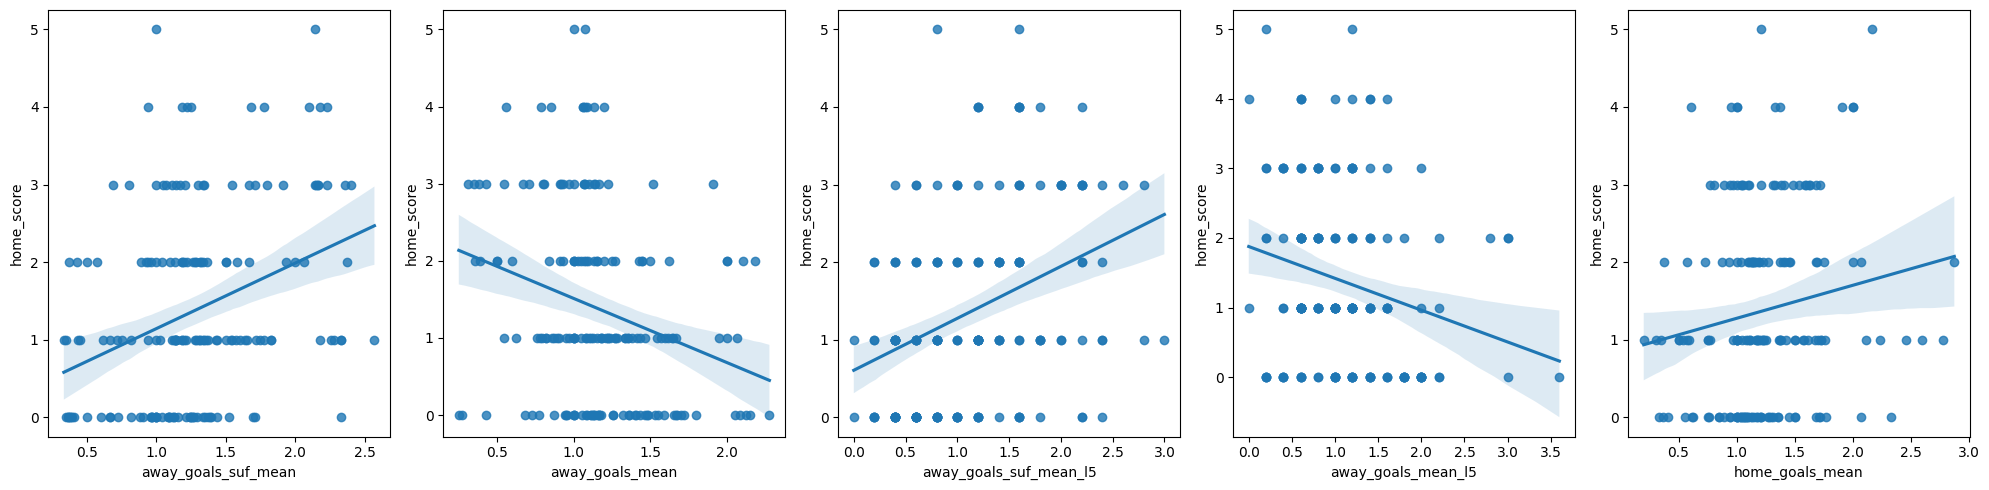

In [27]:
from sklearn.linear_model import LinearRegression

# Asumiendo que tienes definidos df_feats, target y possible_features

# Lista para almacenar las pendientes
slopes = []

# Calcular las pendientes
for feature in possible_features:
    X = df_feats[[feature]].values.reshape(-1, 1)
    y = df_feats[target].values
    reg = LinearRegression().fit(X, y)
    slopes.append(reg.coef_[0])

# Crear un DataFrame con las pendientes y las características
slopes_df = pd.DataFrame({'feature': possible_features, 'slope': slopes})

# Ordenar por la magnitud de la pendiente
slopes_df['abs_slope'] = slopes_df['slope'].abs()
slopes_df = slopes_df.sort_values(by='abs_slope', ascending=False)

# Seleccionar las características con las pendientes más pronunciadas
selected_features = slopes_df['feature'].values[:5]  # Aquí seleccionamos las top 3 características

# Mostrar las pendientes y las características seleccionadas
print(slopes_df)
print("Selected features:", selected_features)

# Graficar las características seleccionadas
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[i])

plt.tight_layout()
plt.show()

In [30]:
selected_features = [['away_goals_suf_mean'], ['away_goals_mean'], ['away_goals_suf_mean_l5'], 
 ['away_goals_mean_l5'], ['home_goals_mean']]

ValueError: The following variable cannot be assigned with wide-form data: `hue`

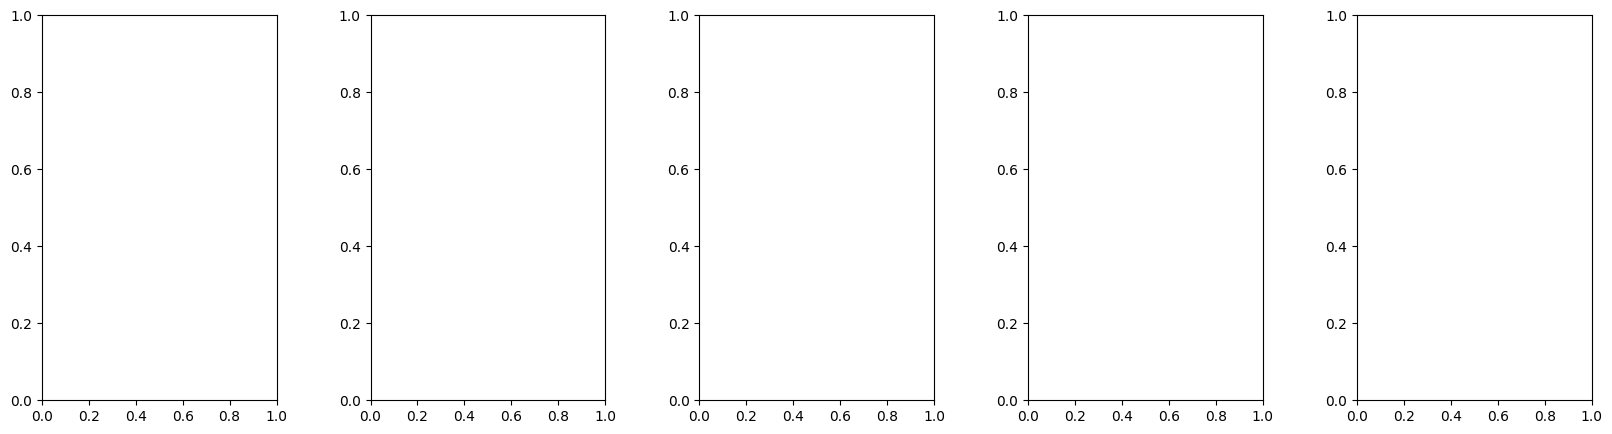

In [33]:
#make subplots for each feature in selected features using kdeplot
num_cols = 3
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(selected_features):
    sns.kdeplot(df_feats[feature[0]], ax=axes[i])

plt.tight_layout()
plt.show()
